# 2

100%|██████████| 170498071/170498071 [00:03<00:00, 51312480.15it/s]


Extracting ./Pineapple/cifar-10-python.tar.gz to ./Pineapple
Files already downloaded and verified
[1,  2000] loss: 2.234
[1,  4000] loss: 1.931
[1,  6000] loss: 1.723
[1,  8000] loss: 1.614
[1, 10000] loss: 1.524
[1, 12000] loss: 1.469
[2,  2000] loss: 1.409
[2,  4000] loss: 1.371
[2,  6000] loss: 1.352
[2,  8000] loss: 1.308
[2, 10000] loss: 1.289
[2, 12000] loss: 1.302
[3,  2000] loss: 1.213
[3,  4000] loss: 1.208
[3,  6000] loss: 1.214
[3,  8000] loss: 1.210
[3, 10000] loss: 1.190
[3, 12000] loss: 1.175
[4,  2000] loss: 1.107
[4,  4000] loss: 1.111
[4,  6000] loss: 1.105
[4,  8000] loss: 1.115
[4, 10000] loss: 1.121
[4, 12000] loss: 1.128
[5,  2000] loss: 1.039
[5,  4000] loss: 1.028
[5,  6000] loss: 1.057
[5,  8000] loss: 1.038
[5, 10000] loss: 1.023
[5, 12000] loss: 1.055
[6,  2000] loss: 0.937
[6,  4000] loss: 0.993
[6,  6000] loss: 0.969
[6,  8000] loss: 0.987
[6, 10000] loss: 1.028
[6, 12000] loss: 0.982
[7,  2000] loss: 0.905
[7,  4000] loss: 0.935
[7,  6000] loss: 0.924
[7, 

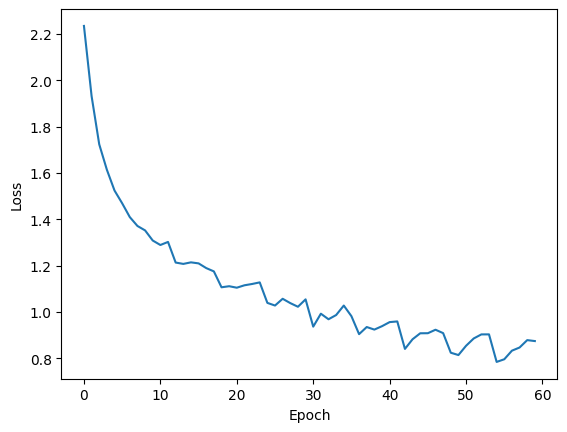

Confusion Matrix:
[[640  31  37  32  29   4   6   7 144  70]
 [ 13 772   3  14   7   6   3   1  52 129]
 [ 65  14 473  99 160  56  42  35  44  12]
 [ 35  11  68 471 109 125  50  35  52  44]
 [ 21  12  55  75 666  26  38  60  31  16]
 [ 14   6  68 277  93 423  17  50  27  25]
 [  8  11  60  93 104  20 653   7  19  25]
 [ 21   6  43  75 136  48   7 612  12  40]
 [ 45  28  11  20   8   5   5   2 847  29]
 [ 44 118   5  24  16   8   4  10  53 718]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1000
           1       0.77      0.77      0.77      1000
           2       0.57      0.47      0.52      1000
           3       0.40      0.47      0.43      1000
           4       0.50      0.67      0.57      1000
           5       0.59      0.42      0.49      1000
           6       0.79      0.65      0.72      1000
           7       0.75      0.61      0.67      1000
           8       0.66      0.85      0.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Задаем гиперпараметры
num_epochs = 10
batch_size = 4
learning_rate = 0.001

# Загружаем данные и выполняем предобработку
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./Pineapple', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./Pineapple', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Определяем архитектуру нейронной сети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# Обучаем нейронную сеть
loss_list = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            loss_list.append(running_loss / 2000)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# Отображаем график значений функции потерь на обучающем множестве
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Вычисляем confusion matrix и classification report на основе тестового множества
y_true = []
y_pred = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true += labels.tolist()
        y_pred += predicted.tolist()

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))
print('Classification Report:')
print(classification_report(y_true, y_pred))

# 3

Минимум функции y(x) на отрезке [-10.75, -9]: x = -9.7503023147583, y = -28.115718841552734


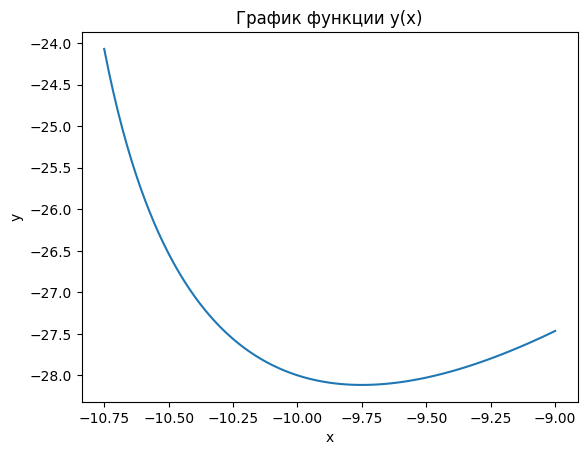

In [3]:
import torch
import matplotlib.pyplot as plt

# Определяем функцию y(x)
def y(x):
    return 4*x - 5*torch.log(x+11) + 12

# Определяем отрезок [-10.75, -9]
a = -10.75
b = -9

# Определяем точность поиска экстремума
eps = 0.001

# Определяем начальную точку
x = torch.tensor([(a+b)/2], requires_grad=True)

# Определяем оптимизатор и запускаем процесс оптимизации
optimizer = torch.optim.SGD([x], lr=0.01)
while True:
    optimizer.zero_grad()
    y_val = y(x)
    y_val.backward()
    optimizer.step()
    if abs(x.grad) < eps:
        break

# Выводим результаты
print('Минимум функции y(x) на отрезке [{}, {}]: x = {}, y = {}'.format(a, b, x.item(), y(x).item()))

# Отображаем график функции y(x) на заданном отрезке
x_vals = torch.linspace(a, b, 100)
y_vals = y(x_vals)
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции y(x)')
plt.show()